In [219]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [220]:
df = pd.read_sas('DR1IFF_I.XPT')
df = df.dropna()

In [221]:
data = df[['DR1_020', 'DR1ICARB', 'DR1_030Z']].copy()

In [222]:
data.head()

,DR1_020,DR1ICARB,DR1_030Z
0,27000.0,5.397605e-79,1.0
1,27000.0,3.560000e+00,1.0
2,27000.0,2.320000e+00,1.0
3,28800.0,5.397605e-79,7.0
4,32400.0,4.088000e+01,1.0


In [223]:
data = data.sort_values(by=['DR1_020'])
data['DR1_020'] = data['DR1_020']/3600
data.drop(data[data.DR1ICARB < 5e-20].index, inplace=True)
data.drop(data[data.DR1_020 < 1e-20].index, inplace=True)
data.index = data.DR1_020
data = data.drop(['DR1_020'], axis=1)

In [224]:
for row, value in data.iterrows():
    if value['DR1_030Z'] == 10:
        value['DR1_030Z'] = 1
    elif value['DR1_030Z'] == 11 or value['DR1_030Z'] == 12 or value['DR1_030Z'] == 5:
        value['DR1_030Z'] = 2
    elif value['DR1_030Z'] == 14:
        value['DR1_030Z'] = 3
    elif value['DR1_030Z'] == 4 or value['DR1_030Z'] == 9 or value['DR1_030Z'] == 13 or value['DR1_030Z'] == 15 or value['DR1_030Z'] == 16 or value['DR1_030Z'] == 17 or value['DR1_030Z'] == 18:
        value['DR1_030Z'] = 6
    elif value['DR1_030Z'] == 19:
        value['DR1_030Z'] = 7

In [225]:
unique_time = data.index.unique().values

In [226]:
meal = pd.DataFrame()
for time in unique_time:
    df1 = data[data.index.values==time]
    c1 = 0
    c2 = 0
    c3 = 0
    c6 = 0
    c7 = 0
    cho1 = 0
    cho2 = 0
    cho3 = 0
    cho6 = 0
    cho7 = 0
    for row,value in df1.iterrows():
        if value.DR1_030Z == 1:
            cho1 = cho1 + value.DR1ICARB
            c1 = c1 + 1
        if value.DR1_030Z == 2:
            cho2 = cho2 + value.DR1ICARB
            c2 = c2 + 1
        if value.DR1_030Z == 3:
            cho3 = cho3 + value.DR1ICARB
            c3 = c3 + 1
        if value.DR1_030Z == 6:
            cho6 = cho6 + value.DR1ICARB
            c6 = c6 + 1
        if value.DR1_030Z == 7:
            cho7 = cho7 + value.DR1ICARB
            c7 = c7 + 1
    if c1!=0:
        cho1 = cho1/c1
        df_dict = {'time':time,'occasion':1,'cho':cho1}
        meal = meal.append(df_dict, ignore_index=True)
    if c2!=0:
        cho2 = cho2/c2
        df_dict = {'time':time,'occasion':2,'cho':cho2}
        meal = meal.append(df_dict, ignore_index=True)
    if c3!=0:
        cho3 = cho3/c3
        df_dict = {'time':time,'occasion':3,'cho':cho3}
        meal = meal.append(df_dict, ignore_index=True)
    if c6!=0:
        cho6 = cho6/c6
        df_dict = {'time':time,'occasion':6,'cho':cho6}
        meal = meal.append(df_dict, ignore_index=True)
    if c7!=0:
        cho7 = cho7/c7
        df_dict = {'time':time,'occasion':7,'cho':cho7}
        meal = meal.append(df_dict, ignore_index=True)

In [227]:
meal1 = pd.DataFrame()
for time in unique_time:
    df1 = data[data.index.values==time]
    cho = np.mean(df1.DR1ICARB.values)
    df_dict = {'time':time,'cho':cho}
    meal1 = meal1.append(df_dict, ignore_index=True)

Text(0.5, 1.0, 'time vs CHO of all participants averaged')

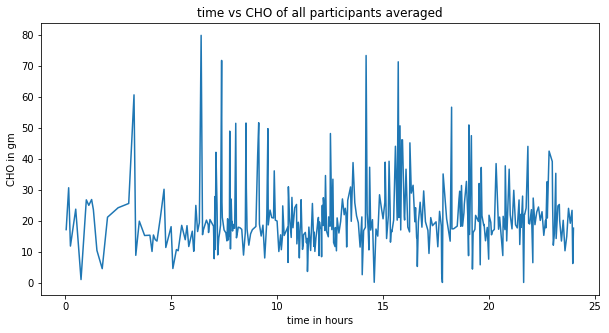

In [228]:
plt.plot(meal1.time.values, meal1.cho.values, label="original")
plt.xlabel("time in hours")
plt.ylabel("CHO in gm")
plt.title("time vs CHO of all participants averaged")

78.98655846757414


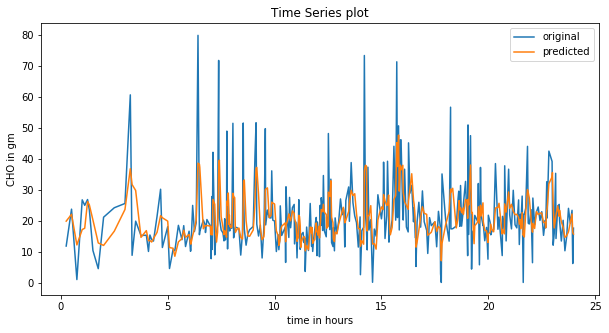

In [229]:
meal1['CHO_MA'] = meal1.cho.rolling(window=3).mean()
meal1 = meal1.dropna()
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 5
plt.plot(meal1.time.values, meal1.cho.values, label="original")
plt.plot(meal1.time.values, meal1.CHO_MA.values, label="predicted")
plt.legend()
plt.xlabel("time in hours")
plt.ylabel("CHO in gm")
plt.title("Time Series plot")
print(mean_squared_error(meal1.cho.values, meal1.CHO_MA.values))

Text(0, 0.5, 'CHO in gm')

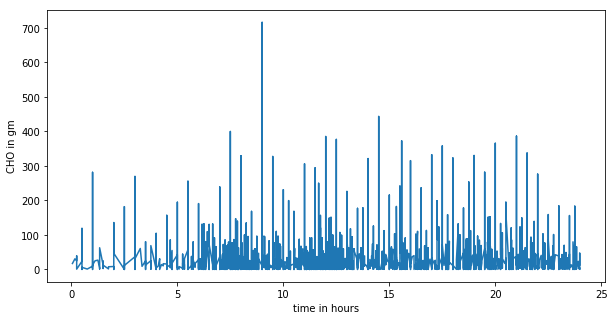

In [230]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 5
plt.plot(data.index.values, data['DR1ICARB'].values)
plt.xlabel("time in hours")
plt.ylabel("CHO in gm")

### Data Smoothing

Text(0.5, 1.0, 'Time Series plot')

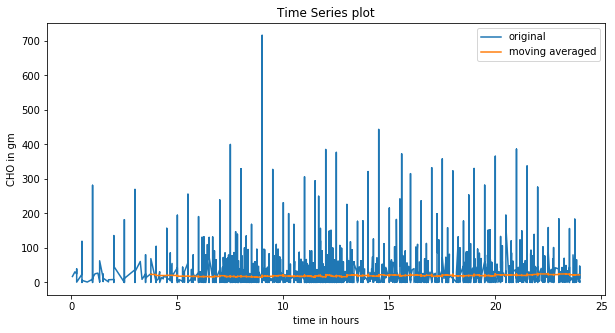

In [231]:
# Tail-rolling average transform
data['CHO_MA'] = data['DR1ICARB'].rolling(window=500).mean()
#print(rolling_mean.head(10))
# plot original and transformed dataset
plt.plot(data.index.values, data['DR1ICARB'].values, label="original")
plt.plot(data.index.values, data['CHO_MA'].values, label="moving averaged")
plt.legend()
plt.xlabel("time in hours")
plt.ylabel("CHO in gm")
plt.title("Time Series plot")

Text(0.5, 1.0, 'Time Series plot')

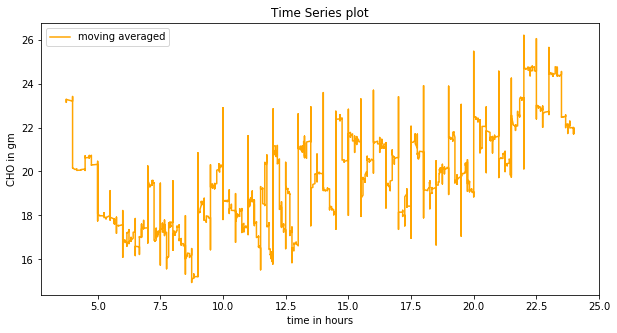

In [232]:
plt.plot(data.index.values, data['CHO_MA'].values, label="moving averaged", color="orange")
plt.legend()
plt.xlabel("time in hours")
plt.ylabel("CHO in gm")
plt.title("Time Series plot")

### Prediction

In [233]:
data = data.dropna()

In [234]:
X = data.index.values

In [235]:
y = data['CHO_MA'].values

#### Prediction

In [236]:
X = X.reshape(-1, 1)

### Linear Regression

In [237]:
lr = LinearRegression().fit(X,y)
print("Training score:", lr.score(X, y)*100)
y_predlr = lr.predict(X)
print("MSE:", mean_squared_error(y,y_predlr))
print("R2 score:", r2_score(y,y_predlr))

Training score: 42.44308598661984
MSE: 2.17614847251454
R2 score: 0.42443085986619844


Text(0, 0.5, 'CHO in gm')

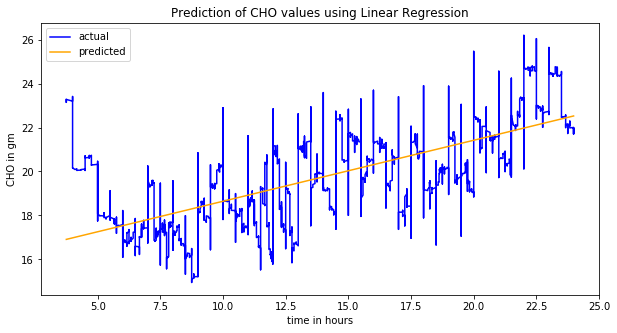

In [238]:
plt.plot(X, y, label="actual", color="blue")
plt.plot(X, y_predlr, label="predicted", color="orange")
plt.legend()
plt.title("Prediction of CHO values using Linear Regression")
plt.xlabel("time in hours")
plt.ylabel("CHO in gm")

### Ridge Regression

In [239]:
ridge = Ridge().fit(X,y)
print("Training score:", ridge.score(X, y)*100)
y_predr = ridge.predict(X)
print("MSE:", mean_squared_error(y,y_predr))
print("R2 score:", r2_score(y,y_predr))

Training score: 42.44308598660941
MSE: 2.176148472514934
R2 score: 0.4244308598660942


Text(0, 0.5, 'CHO in gm')

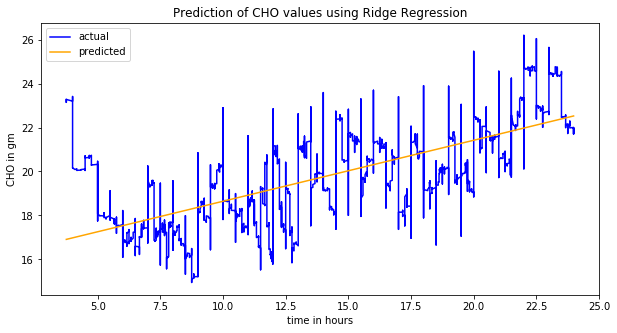

In [240]:
plt.plot(X, y, label="actual", color="blue")
plt.plot(X, y_predr, label="predicted", color="orange")
plt.legend()
plt.title("Prediction of CHO values using Ridge Regression")
plt.xlabel("time in hours")
plt.ylabel("CHO in gm")

### Lasso Regression

In [241]:
lasso = Lasso().fit(X,y)
print("Training score:", lasso.score(X, y)*100)
y_predl = lasso.predict(X)
print("MSE:", mean_squared_error(y,y_predl))
print("R2 score:", r2_score(y,y_predl))

Training score: 41.172561235952394
MSE: 2.224185281694653
R2 score: 0.4117256123595239


Text(0, 0.5, 'CHO in gm')

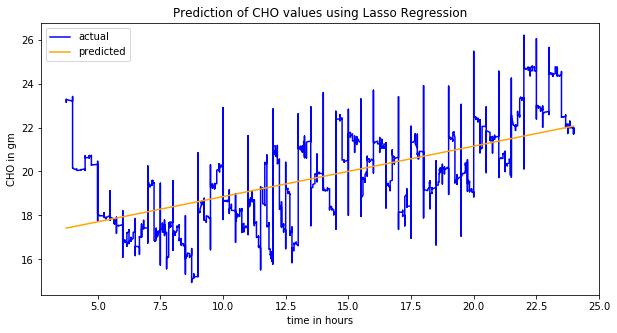

In [242]:
plt.plot(X, y, label="actual", color="blue")
plt.plot(X, y_predl, label="predicted", color="orange")
plt.legend()
plt.title("Prediction of CHO values using Lasso Regression")
plt.xlabel("time in hours")
plt.ylabel("CHO in gm")

### Random Forest Regression

In [243]:
regr = RandomForestRegressor(random_state=0, n_estimators=1000)
regr.fit(X, y) 
print("Training score:", regr.score(X, y)*100)
#print("Test score:", regr.score(X_test, y_test)*100)
y_predrg = regr.predict(X)
print("MSE:", mean_squared_error(y,y_predrg))
print("R2 score:", r2_score(y,y_predrg))

Training score: 71.36933593339452
MSE: 1.0824863866248386
R2 score: 0.7136933593339453


Text(0, 0.5, 'CHO in gm')

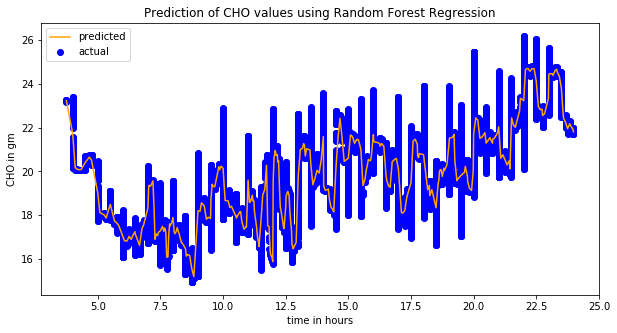

In [244]:
plt.scatter(X, y, label="actual", color="blue")
plt.plot(X,y_predrg, label="predicted", color="orange")
plt.legend()
plt.title("Prediction of CHO values using Random Forest Regression")
plt.xlabel("time in hours")
plt.ylabel("CHO in gm")

### Clustering

In [245]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [246]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)
y2 = data.DR1_030Z.values
y2 = y2.reshape(-1,1)

In [247]:
meal = np.concatenate((X, y, y2),axis=1)

In [31]:
range_n_clusters = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
for n_clusters in range_n_clusters:
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(meal)
    centers = clusterer.cluster_centers_
    score = silhouette_score (meal, preds, metric='euclidean')
    print ("For clusters =", n_clusters, ", silhouette score is", score)

For clusters = 3 , silhouette score is 0.4330728162294243
For clusters = 4 , silhouette score is 0.43998790380202357
For clusters = 5 , silhouette score is 0.5027783838743474
For clusters = 6 , silhouette score is 0.5244763371351162
For clusters = 7 , silhouette score is 0.539906066360256
For clusters = 8 , silhouette score is 0.5448062291149842
For clusters = 9 , silhouette score is 0.5644800952127745
For clusters = 10 , silhouette score is 0.5586769520342386
For clusters = 11 , silhouette score is 0.5359586600814948
For clusters = 12 , silhouette score is 0.5138428316388595


In [248]:
total = np.concatenate((X, y), axis=1)

In [249]:
kmeans = KMeans(n_clusters=9) 
kmeans.fit(total)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [250]:
centroids = kmeans.cluster_centers_

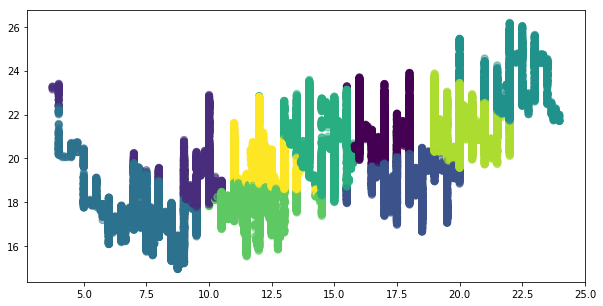

In [251]:
plt.scatter(total[:,0], total[:,1], c= kmeans.labels_.astype(float), s=50, alpha=0.5)

In [252]:
labels = kmeans.labels_

In [253]:
labels = labels.reshape(-1,1)

In [254]:
total = np.concatenate((total, labels), axis=1)

In [255]:
c0 = np.array([])
c1 = np.array([])
c2 = np.array([])
c3 = np.array([])
c4 = np.array([])
c5 = np.array([])
c6 = np.array([])
c7 = np.array([])
c8 = np.array([])
#c9 = np.array([])
for i in range(len(total)):
    label = total[i,2]
    if label == 0:
        if (len(c0) == 0):
            c0 = np.append(c0, total[i])
        else:
            c0 = np.vstack((c0, total[i]))
    if label == 1:
        if (len(c1) == 0):
            c1 = np.append(c1, total[i])
        else:
            c1 = np.vstack((c1, total[i]))
    if label == 2:
        if (len(c2) == 0):
            c2 = np.append(c2, total[i])
        else:
            c2 = np.vstack((c2, total[i]))
    if label == 3:
        if (len(c3) == 0):
            c3 = np.append(c3, total[i])
        else:
            c3 = np.vstack((c3, total[i]))
    if label == 4:
        if (len(c4) == 0):
            c4 = np.append(c4, total[i])
        else:
            c4 = np.vstack((c4, total[i]))
    if label == 5:
        if (len(c5) == 0):
            c5 = np.append(c5, total[i])
        else:
            c5 = np.vstack((c5, total[i]))
    if label == 6:
        if (len(c6) == 0):
            c6 = np.append(c6, total[i])
        else:
            c6 = np.vstack((c6, total[i]))
    if label == 7:
        if (len(c7) == 0):
            c7 = np.append(c7, total[i])
        else:
            c7 = np.vstack((c7, total[i]))
    if label == 8:
        if (len(c8) == 0):
            c8 = np.append(c8, total[i])
        else:
            c8 = np.vstack((c8, total[i]))
    '''
    if label == 9:
        if (len(c9) == 0):
            c9 = np.append(c9, total[i])
        else:
            c9 = np.vstack((c9, total[i]))
    '''

#### Prediction on c0

In [256]:
X = c0[:,0]
y = c0[:,1]
X = X.reshape(-1,1)
y = y.reshape(-1,1)

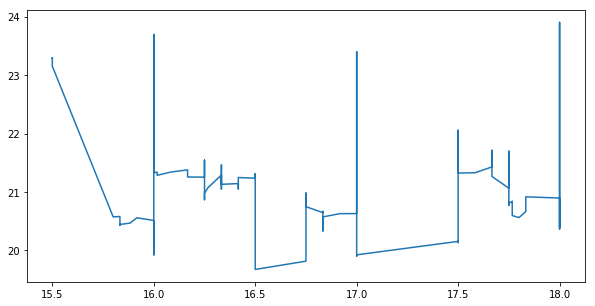

In [257]:
plt.plot(X, y)

In [258]:
regr = RandomForestRegressor(random_state=0, n_estimators=1000)
regr.fit(X, y) 
print("Training score:", regr.score(X, y))
y_predrg = regr.predict(X)
print("MSE:", mean_squared_error(y,y_predrg))
print("R2 score:", r2_score(y,y_predrg))

/home/nishtha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Training score: 0.20924307188016278
MSE: 0.5207157761668535
R2 score: 0.20924307188016278


### Prediction on c1

/home/nishtha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Training score: 0.33663900038516426
MSE: 0.9287444645928171
R2 score: 0.33663900038516426


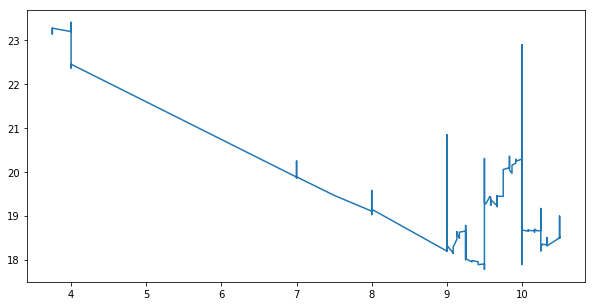

In [259]:
X = c1[:,0]
y = c1[:,1]
X = X.reshape(-1,1)
y = y.reshape(-1,1)
plt.plot(X, y)
regr = RandomForestRegressor(random_state=0, n_estimators=1000)
regr.fit(X, y) 
print("Training score:", regr.score(X, y))
y_predrg = regr.predict(X)
print("MSE:", mean_squared_error(y,y_predrg))
print("R2 score:", r2_score(y,y_predrg))

Text(0, 0.5, 'CHO in gm')

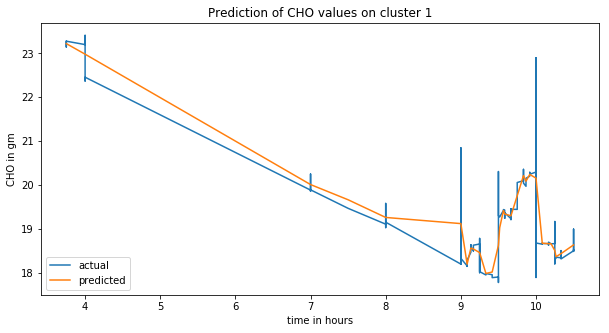

In [261]:
plt.plot(X,y, label="actual")
plt.plot(X, y_predrg, label="predicted")
plt.legend()
plt.title("Prediction of CHO values on cluster 1")
plt.xlabel("time in hours")
plt.ylabel("CHO in gm")

#### Prediction on c2

Training score: 0.34393589112594036
MSE: 0.5084844173406322
R2 score: 0.34393589112594036


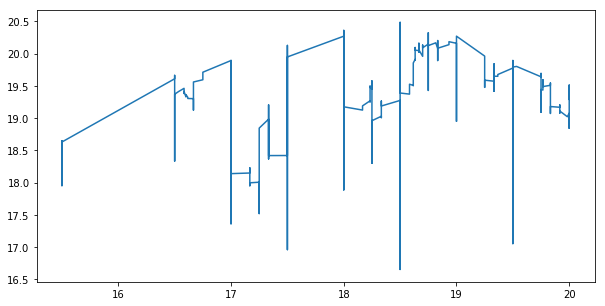

In [262]:
X = c2[:,0]
y = c2[:,1]
X = X.reshape(-1,1)
#y = y.reshape(-1,1)
plt.plot(X, y)
regr = RandomForestRegressor(random_state=0, n_estimators=1000)
regr.fit(X, y) 
print("Training score:", regr.score(X, y))
y_predrg = regr.predict(X)
print("MSE:", mean_squared_error(y,y_predrg))
print("R2 score:", r2_score(y,y_predrg))

Text(0, 0.5, 'CHO in gm')

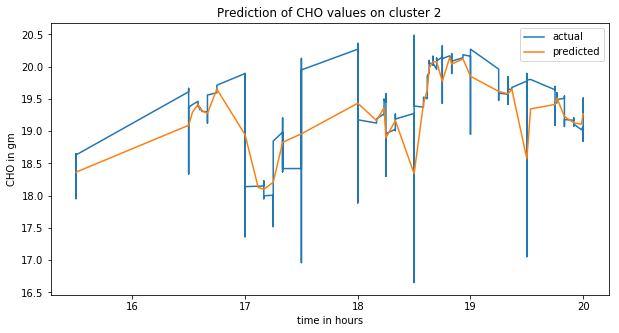

In [264]:
plt.plot(X,y, label="actual")
plt.plot(X, y_predrg, label="predicted")
plt.legend()
plt.title("Prediction of CHO values on cluster 2")
plt.xlabel("time in hours")
plt.ylabel("CHO in gm")

#### Prediction on c3

Training score: 0.5776930089840355
MSE: 0.4064602200576986
R2 score: 0.5776930089840355


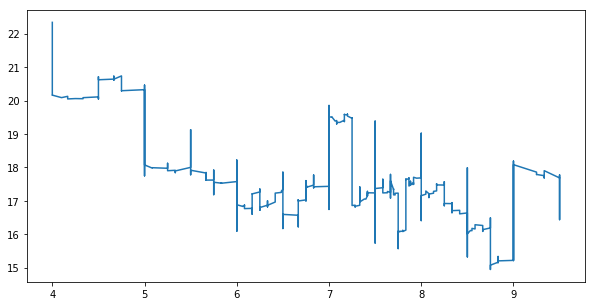

In [265]:
X = c3[:,0]
y = c3[:,1]
X = X.reshape(-1,1)
#y = y.reshape(-1,1)
plt.plot(X, y)
regr = RandomForestRegressor(random_state=0, n_estimators=1000)
regr.fit(X, y) 
print("Training score:", regr.score(X, y))
y_predrg = regr.predict(X)
print("MSE:", mean_squared_error(y,y_predrg))
print("R2 score:", r2_score(y,y_predrg))

Text(0, 0.5, 'CHO in gm')

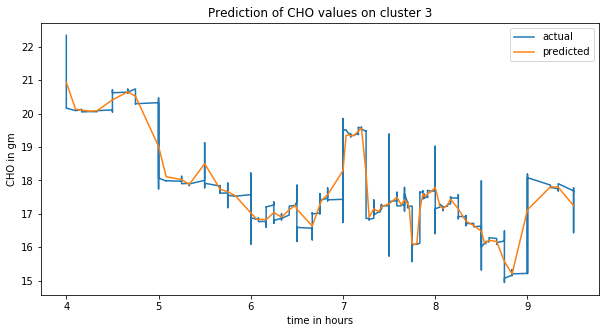

In [266]:
plt.plot(X,y, label="actual")
plt.plot(X, y_predrg, label="predicted")
plt.legend()
plt.title("Prediction of CHO values on cluster 3")
plt.xlabel("time in hours")
plt.ylabel("CHO in gm")

#### Prediction on c4

Training score: 0.2732093047140808
MSE: 0.8476725976893742
R2 score: 0.2732093047140808


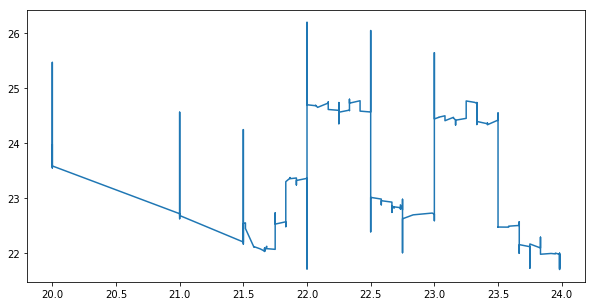

In [267]:
X = c4[:,0]
y = c4[:,1]
X = X.reshape(-1,1)
#y = y.reshape(-1,1)
plt.plot(X, y)
regr = RandomForestRegressor(random_state=0, n_estimators=1000)
regr.fit(X, y) 
print("Training score:", regr.score(X, y))
y_predrg = regr.predict(X)
print("MSE:", mean_squared_error(y,y_predrg))
print("R2 score:", r2_score(y,y_predrg))

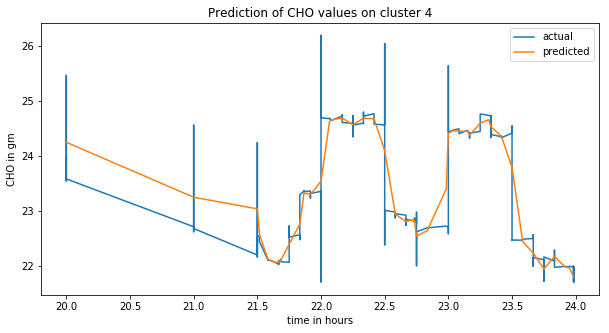

In [268]:
ax4 = plt.plot(X,y, label="actual")
ax4 = plt.plot(X, y_predrg, label="predicted")
ax4 = plt.legend()
ax4 = plt.title("Prediction of CHO values on cluster 4")
ax4 = plt.xlabel("time in hours")
ax4 = plt.ylabel("CHO in gm")

#### Prediction on c5

Training score: 0.2472153688140227
MSE: 0.9135088383195887
R2 score: 0.24721536881402273


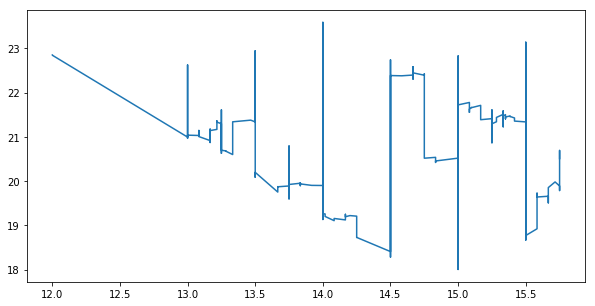

In [269]:
X = c5[:,0]
y = c5[:,1]
X = X.reshape(-1,1)
#y = y.reshape(-1,1)
plt.plot(X, y)
regr = RandomForestRegressor(random_state=0, n_estimators=1000)
regr.fit(X, y) 
print("Training score:", regr.score(X, y))
y_predrg = regr.predict(X)
print("MSE:", mean_squared_error(y,y_predrg))
print("R2 score:", r2_score(y,y_predrg))

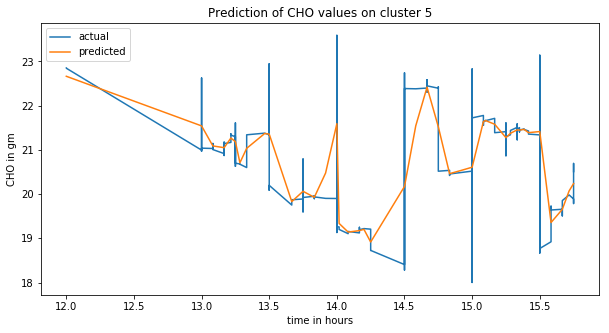

In [270]:
ax5 = plt.plot(X,y, label="actual")
ax5 = plt.plot(X, y_predrg, label="predicted")
ax5 = plt.legend()
ax5 = plt.title("Prediction of CHO values on cluster 5")
ax5 = plt.xlabel("time in hours")
ax5 = plt.ylabel("CHO in gm")

#### Prediction on c6

Training score: 0.26452155373312536
MSE: 0.34392245559572593
R2 score: 0.26452155373312536


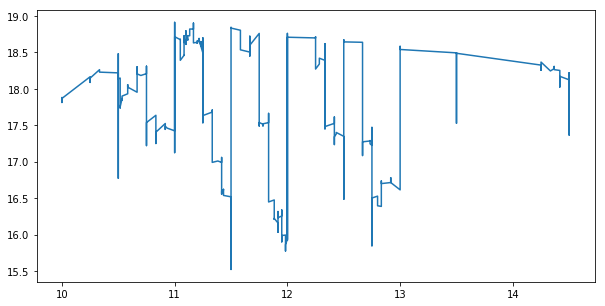

In [271]:
X = c6[:,0]
y = c6[:,1]
X = X.reshape(-1,1)
#y = y.reshape(-1,1)
plt.plot(X, y)
regr = RandomForestRegressor(random_state=0, n_estimators=1000)
regr.fit(X, y) 
print("Training score:", regr.score(X, y))
y_predrg = regr.predict(X)
print("MSE:", mean_squared_error(y,y_predrg))
print("R2 score:", r2_score(y,y_predrg))

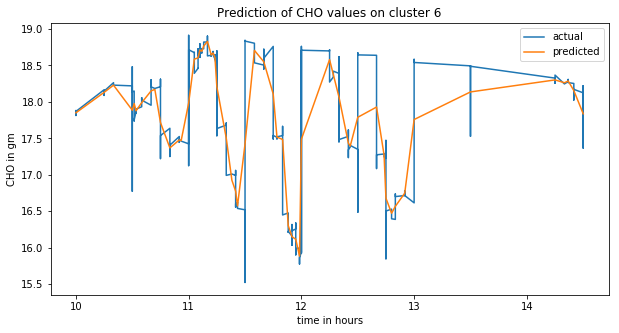

In [272]:
ax6 = plt.plot(X,y, label="actual")
ax6 = plt.plot(X, y_predrg, label="predicted")
ax6 = plt.legend()
ax6 = plt.title("Prediction of CHO values on cluster 6")
ax6 = plt.xlabel("time in hours")
ax6 = plt.ylabel("CHO in gm")

#### Prediction on c7

Training score: 0.08053276455560388
MSE: 0.6583762074080018
R2 score: 0.08053276455560388


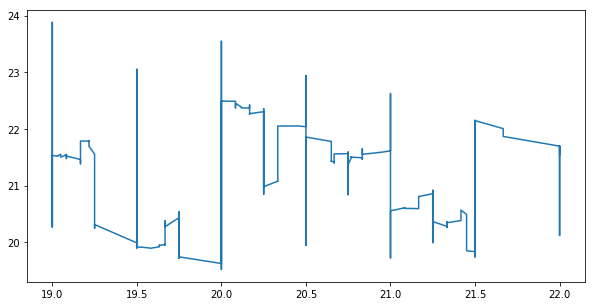

In [273]:
X = c7[:,0]
y = c7[:,1]
X = X.reshape(-1,1)
#y = y.reshape(-1,1)
plt.plot(X, y)
regr = RandomForestRegressor(random_state=0, n_estimators=1000)
regr.fit(X, y) 
print("Training score:", regr.score(X, y))
y_predrg = regr.predict(X)
print("MSE:", mean_squared_error(y,y_predrg))
print("R2 score:", r2_score(y,y_predrg))

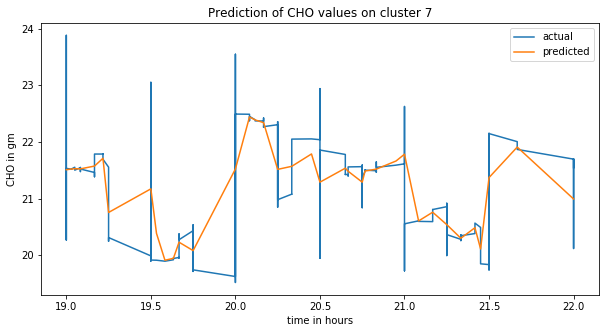

In [274]:
ax7 = plt.plot(X,y, label="actual")
ax7 = plt.plot(X, y_predrg, label="predicted")
ax7 = plt.legend()
ax7 = plt.title("Prediction of CHO values on cluster 7")
ax7 = plt.xlabel("time in hours")
ax7 = plt.ylabel("CHO in gm")

#### Prediction on c8

Training score: 0.14060089359859118
MSE: 0.499686946596728
R2 score: 0.14060089359859118


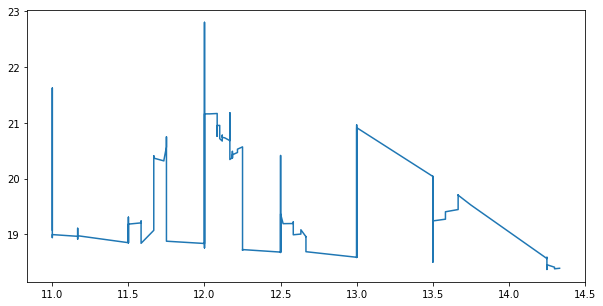

In [275]:
X = c8[:,0]
y = c8[:,1]
X = X.reshape(-1,1)
#y = y.reshape(-1,1)
plt.plot(X, y)
regr = RandomForestRegressor(random_state=0, n_estimators=1000)
regr.fit(X, y) 
print("Training score:", regr.score(X, y))
y_predrg = regr.predict(X)
print("MSE:", mean_squared_error(y,y_predrg))
print("R2 score:", r2_score(y,y_predrg))

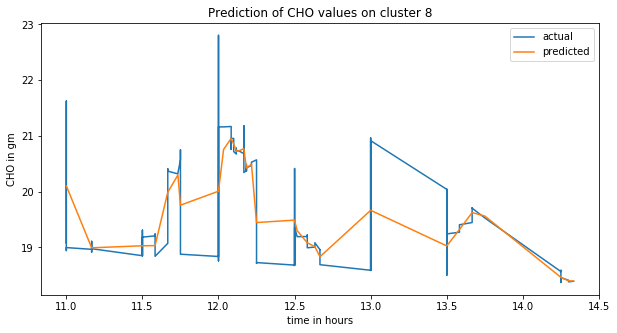

In [276]:
ax8 = plt.plot(X,y, label="actual")
ax8 = plt.plot(X, y_predrg, label="predicted")
ax8 = plt.legend()
ax8 = plt.title("Prediction of CHO values on cluster 8")
ax8 = plt.xlabel("time in hours")
ax8 = plt.ylabel("CHO in gm")

### Manual Clustering

In [277]:
occasiondict = {
    1 : { 'name' : 'Breakfast\nDesayano', 'count' : 0, 'cho' : 0},
    2 : { 'name' : 'Lunch\nAlmuerzo\nCena', 'count' : 0, 'cho' : 0},
    3 : { 'name' : 'Dinner', 'count' : 0, 'cho' : 0},
    6 : { 'name' : 'Snack\nMerienda\nBotana\nBocadillo\nTentempie', 'count' : 0, 'cho' : 0},
    7 : { 'name' : 'Drink\nBebida', 'count' : 0, 'cho' : 0},
}

In [278]:
data = data.dropna()

In [279]:
for key in occasiondict.keys():
    for row, value in data.iterrows():
        if value['DR1_030Z'] == key:
            occasiondict[key]['count'] += 1
            occasiondict[key]['cho'] += value['CHO_MA']

In [280]:
occasionnames = []
occasioncho = []
for key in occasiondict: 
    occasionnames.append(occasiondict[key]['name'])
    occasioncho.append(occasiondict[key]['cho']/occasiondict[key]['count'])

Text(0, 0.5, 'average CHO level')

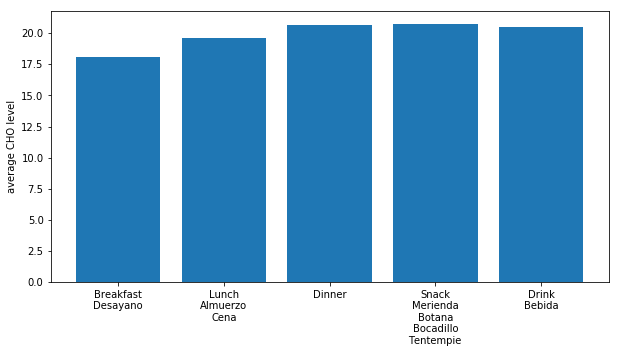

In [281]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
plt.bar(np.arange(len(occasionnames)), occasioncho)
plt.xticks(np.arange(len(occasionnames)), occasionnames)
plt.ylabel('average CHO level')

### Breakfast

In [300]:
breakfastdf = data[data['DR1_030Z'] == 1]

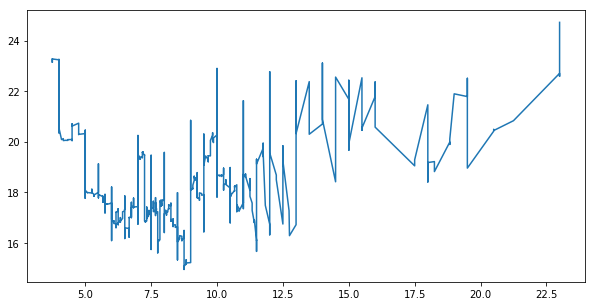

In [301]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
plt.plot(breakfastdf.index, breakfastdf['CHO_MA'].values)

In [302]:
X = breakfastdf.index.values

In [303]:
y = breakfastdf['CHO_MA'].values

In [320]:
test = breakfastdf[(breakfastdf.index.values > 4) & (breakfastdf.index.values < 12)]

In [321]:
X_test = test.index.values
y_test = test.CHO_MA.values

In [322]:
X = X.reshape(-1,1)
#y = y.reshape(-1,1)
regr = RandomForestRegressor(random_state=0, n_estimators=1000)
regr.fit(X, y) 
print("Training score:", regr.score(X, y))
y_predrg = regr.predict(X)
print("MSE:", mean_squared_error(y,y_predrg))
print("R2 score:", r2_score(y,y_predrg))

Training score: 0.6101900847683812
MSE: 0.7752212559108371
R2 score: 0.6101900847683812


Text(0.5, 1.0, 'Actual and Predicted values on Breakfast Cluster')

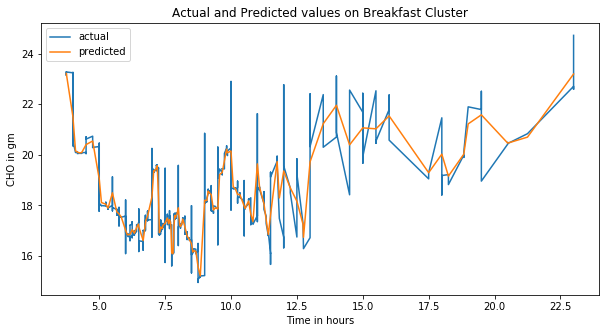

In [326]:
plt.plot(X,y, label="actual")
plt.plot(X, y_predrg, label="predicted")
plt.legend()
plt.xlabel('Time in hours')
plt.ylabel('CHO in gm')
plt.title("Actual and Predicted values on Breakfast Cluster")

0.7642722570337857


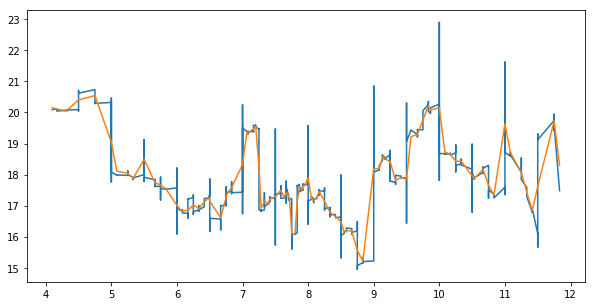

In [325]:
X_test = X_test.reshape(-1,1)
yp = regr.predict(X_test)
print(mean_squared_error(y_test, yp))
plt.plot(X_test, y_test, label="actual")
plt.plot(X_test, yp, label="predicted")
plt.legend()
plt.xlabel('Time in hours')
plt.ylabel('CHO in gm')
plt.title("Actual and Predicted values on Breakfast Cluster")

### Lunch

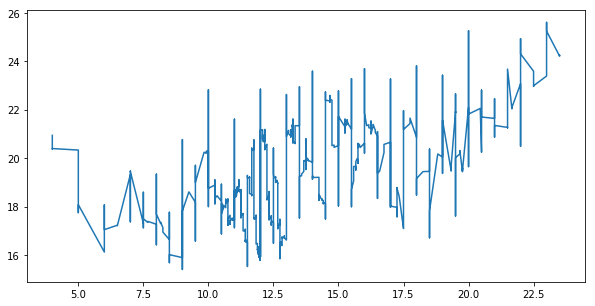

In [327]:
lunchdf = data[data['DR1_030Z'] == 2]
plt.plot(lunchdf.index, lunchdf['CHO_MA'].values)

In [328]:
X = lunchdf.index.values
y = lunchdf['CHO_MA'].values
X = X.reshape(-1,1)
#y = y.reshape(-1,1)
regr = RandomForestRegressor(random_state=0, n_estimators=1000)
regr.fit(X, y) 
print("Training score:", regr.score(X, y))
y_predrg = regr.predict(X)
print("MSE:", mean_squared_error(y,y_predrg))
print("R2 score:", r2_score(y,y_predrg))

Training score: 0.5552175227238714
MSE: 1.1374656125593474
R2 score: 0.5552175227238714


Text(0.5, 1.0, 'Actual and Predicted values on Lunch Cluster')

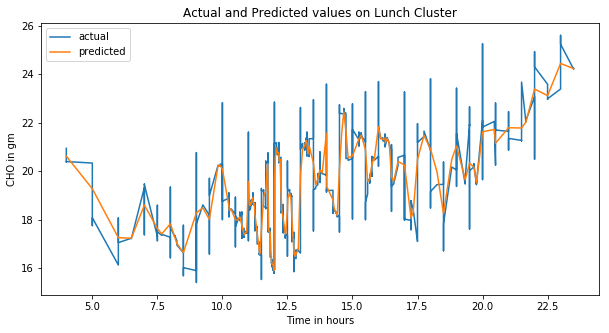

In [329]:
plt.plot(X,y, label="actual")
plt.plot(X, y_predrg, label="predicted")
plt.legend()
plt.xlabel('Time in hours')
plt.ylabel('CHO in gm')
plt.title("Actual and Predicted values on Lunch Cluster")

1.0399756274489924


Text(0.5, 1.0, 'Actual and Predicted values on Lunch Cluster')

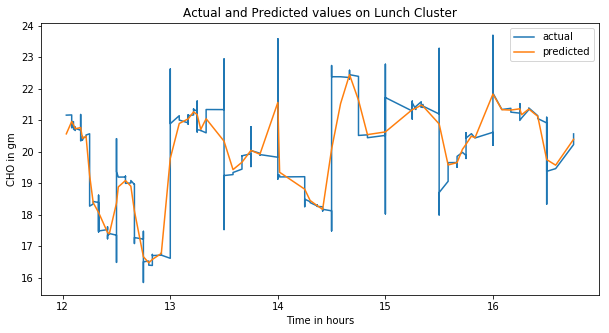

In [339]:
test_lunch = lunchdf[(lunchdf.index.values > 12) & (lunchdf.index.values < 17)]
X_test = test_lunch.index.values
X_test = X_test.reshape(-1,1)
y_test = test_lunch.CHO_MA.values
lunch_pred = regr.predict(X_test)
print(mean_squared_error(y_test, lunch_pred))
plt.plot(X_test,y_test, label="actual")
plt.plot(X_test, lunch_pred, label="predicted")
plt.legend()
plt.xlabel('Time in hours')
plt.ylabel('CHO in gm')
plt.title("Actual and Predicted values on Lunch Cluster")

### Dinner

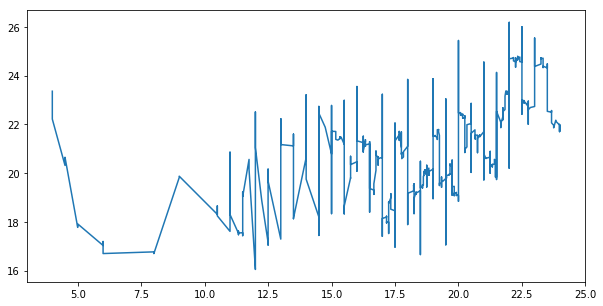

In [340]:
dinnerdf = data[data['DR1_030Z'] == 3]
plt.plot(dinnerdf.index, dinnerdf['CHO_MA'].values)

In [341]:
X = dinnerdf.index.values
y = dinnerdf['CHO_MA'].values
X = X.reshape(-1,1)
#y = y.reshape(-1,1)
regr = RandomForestRegressor(random_state=0, n_estimators=1000)
regr.fit(X, y) 
print("Training score:", regr.score(X, y))
y_predrg = regr.predict(X)
print("MSE:", mean_squared_error(y,y_predrg))
print("R2 score:", r2_score(y,y_predrg))

Training score: 0.5595793667580314
MSE: 1.2091124587890127
R2 score: 0.5595793667580314


Text(0.5, 1.0, 'Actual and Predicted values on Dinner Cluster')

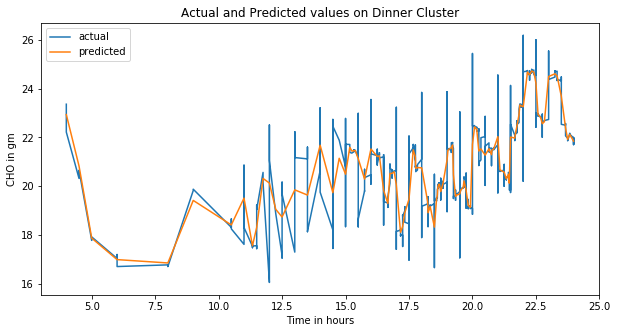

In [342]:
plt.plot(X,y, label="actual")
plt.plot(X, y_predrg, label="predicted")
plt.legend()
plt.xlabel('Time in hours')
plt.ylabel('CHO in gm')
plt.title("Actual and Predicted values on Dinner Cluster")

1.2518193626240979


Text(0.5, 1.0, 'Actual and Predicted values on Dinner Cluster')

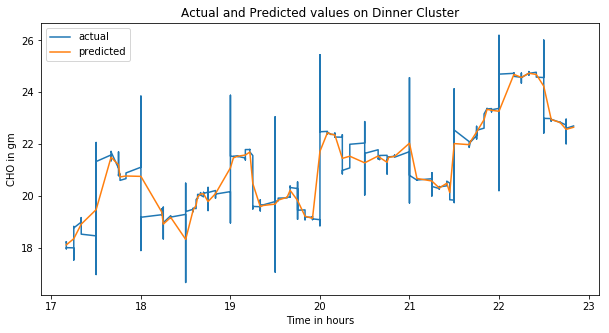

In [345]:
dinner_test = dinnerdf[(dinnerdf.index.values > 17) & (dinnerdf.index.values < 23)]
X_test = dinner_test.index.values
X_test = X_test.reshape(-1,1)
y_test = dinner_test.CHO_MA.values
dinner_pred = regr.predict(X_test)
print(mean_squared_error(y_test, dinner_pred))
plt.plot(X_test,y_test, label="actual")
plt.plot(X_test, dinner_pred, label="predicted")
plt.legend()
plt.xlabel('Time in hours')
plt.ylabel('CHO in gm')
plt.title("Actual and Predicted values on Dinner Cluster")

### Snack

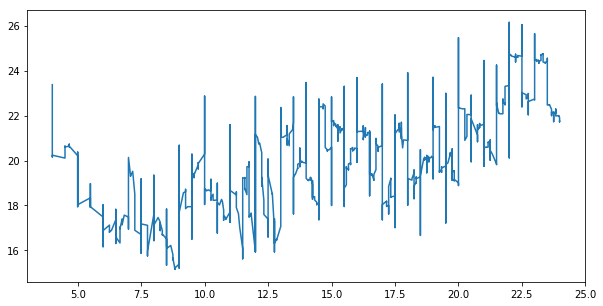

In [294]:
snackdf = data[data['DR1_030Z'] == 6]
plt.plot(snackdf.index, snackdf['CHO_MA'].values)

In [295]:
X = snackdf.index.values
y = snackdf['CHO_MA'].values
X = X.reshape(-1,1)
#y = y.reshape(-1,1)
regr = RandomForestRegressor(random_state=0, n_estimators=1000)
regr.fit(X, y) 
print("Training score:", regr.score(X, y))
y_predrg = regr.predict(X)
print("MSE:", mean_squared_error(y,y_predrg))
print("R2 score:", r2_score(y,y_predrg))

Training score: 0.644116541583301
MSE: 1.1452750098739328
R2 score: 0.644116541583301


Text(0.5, 1.0, 'Actual and Predicted values on Snacks Cluster')

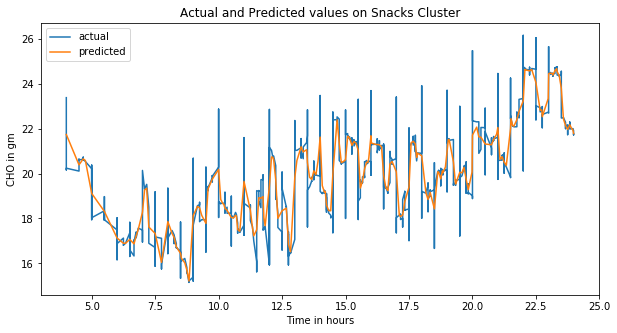

In [296]:
plt.plot(X,y, label="actual")
plt.plot(X, y_predrg, label="predicted")
plt.legend()
plt.xlabel('Time in hours')
plt.ylabel('CHO in gm')
plt.title("Actual and Predicted values on Snacks Cluster")

### Drink

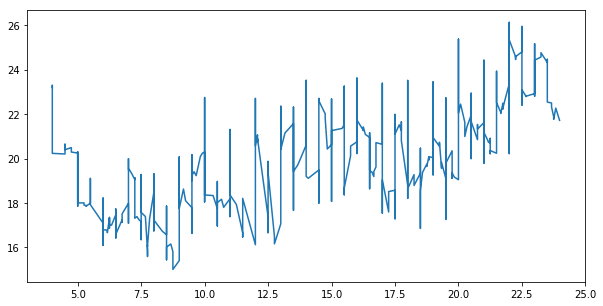

In [297]:
drinkdf = data[data['DR1_030Z'] == 7]
plt.plot(drinkdf.index, drinkdf['CHO_MA'].values)

In [298]:
X = drinkdf.index.values
y = drinkdf['CHO_MA'].values
X = X.reshape(-1,1)
#y = y.reshape(-1,1)
regr = RandomForestRegressor(random_state=0, n_estimators=1000)
regr.fit(X, y) 
print("Training score:", regr.score(X, y))
y_predrg = regr.predict(X)
print("MSE:", mean_squared_error(y,y_predrg))
print("R2 score:", r2_score(y,y_predrg))

Training score: 0.7446232033090214
MSE: 1.109428482555278
R2 score: 0.7446232033090214


Text(0.5, 1.0, 'Actual and Predicted values on Drink Cluster')

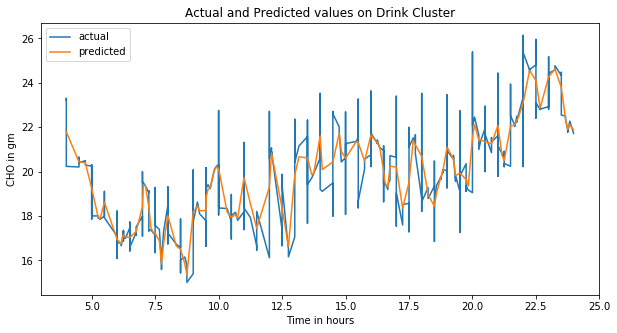

In [299]:
plt.plot(X,y, label="actual")
plt.plot(X, y_predrg, label="predicted")
plt.legend()
plt.xlabel('Time in hours')
plt.ylabel('CHO in gm')
plt.title("Actual and Predicted values on Drink Cluster")